# Importing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import torch
import seaborn as sea
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn.functional as F
import torchvision
from torchvision import models
import cv2 as cv
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import BatchNormalization, Dropout


1.26.4 cpu


# Data

In [ ]:



TRAIN_PATH = os.path.expanduser('~/Desktop/py3/dataset/Train')
TEST_PATH = os.path.expanduser('~/Desktop/py3/dataset/Test')

def load_data(PATH):
    filenames, fruit, fresh = [], [], []

    for file in tqdm(os.listdir(PATH)):
        full_path = os.path.join(PATH, file)
        if os.path.isdir(full_path):
            for img in os.listdir(full_path):
                fresh.append(0 if file[0] == 'f' else 1)
                fruit.append(file[5:] if file[0] == 'f' else file[6:])
                filenames.append(os.path.join(full_path, img))

    df = pd.DataFrame({
        'filename': filenames,
        'fruit': fruit,
        'fresh': fresh
    })

    return df

df_train = load_data(TRAIN_PATH).sample(frac=1)
df_test = load_data(TEST_PATH).sample(frac=1)


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
df_train.shape, df_test.shape

((23619, 3), (6738, 3))

In [ ]:
df_train

,filename,fruit,fresh
1550,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,banana,0
13176,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,oranges,0
7003,/Users/abdu_salih/Desktop/py3/dataset/Train/ro...,tomato,1
9808,/Users/abdu_salih/Desktop/py3/dataset/Train/ro...,banana,1
1220,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,banana,0
...,...,...,...
5940,/Users/abdu_salih/Desktop/py3/dataset/Train/ro...,tomato,1
16888,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,apples,0
11490,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,potato,0
13179,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,oranges,0


In [ ]:
df_test

,filename,fruit,fresh
4296,/Users/abdu_salih/Desktop/py3/dataset/Test/fre...,apples,0
218,/Users/abdu_salih/Desktop/py3/dataset/Test/fre...,banana,0
1367,/Users/abdu_salih/Desktop/py3/dataset/Test/rot...,patato,1
6221,/Users/abdu_salih/Desktop/py3/dataset/Test/rot...,apples,1
2703,/Users/abdu_salih/Desktop/py3/dataset/Test/rot...,banana,1
...,...,...,...
4279,/Users/abdu_salih/Desktop/py3/dataset/Test/fre...,apples,0
3241,/Users/abdu_salih/Desktop/py3/dataset/Test/rot...,banana,1
397,/Users/abdu_salih/Desktop/py3/dataset/Test/fre...,banana,0
63,/Users/abdu_salih/Desktop/py3/dataset/Test/fre...,banana,0


In [ ]:
df_test['fruit'] = df_test['fruit'].map(lambda x : 'tomato' if x == 'tamto' else x)
df_test['fruit'] = df_test['fruit'].map(lambda x : 'potato' if x == 'patato' else x)

In [ ]:
df_test

,filename,fruit,fresh
4296,/Users/abdu_salih/Desktop/py3/dataset/Test/fre...,apples,0
218,/Users/abdu_salih/Desktop/py3/dataset/Test/fre...,banana,0
1367,/Users/abdu_salih/Desktop/py3/dataset/Test/rot...,potato,1
6221,/Users/abdu_salih/Desktop/py3/dataset/Test/rot...,apples,1
2703,/Users/abdu_salih/Desktop/py3/dataset/Test/rot...,banana,1
...,...,...,...
4279,/Users/abdu_salih/Desktop/py3/dataset/Test/fre...,apples,0
3241,/Users/abdu_salih/Desktop/py3/dataset/Test/rot...,banana,1
397,/Users/abdu_salih/Desktop/py3/dataset/Test/fre...,banana,0
63,/Users/abdu_salih/Desktop/py3/dataset/Test/fre...,banana,0


In [ ]:

df_train.drop(df_train[(df_train['fruit'] == 'capsicum')].index, inplace = True)
df_train.drop(df_train[(df_train['fruit'] == 'bittergroud')].index, inplace = True)

In [ ]:
df_train

,filename,fruit,fresh
1550,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,banana,0
13176,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,oranges,0
7003,/Users/abdu_salih/Desktop/py3/dataset/Train/ro...,tomato,1
9808,/Users/abdu_salih/Desktop/py3/dataset/Train/ro...,banana,1
1220,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,banana,0
...,...,...,...
5940,/Users/abdu_salih/Desktop/py3/dataset/Train/ro...,tomato,1
16888,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,apples,0
11490,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,potato,0
13179,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,oranges,0


In [ ]:
df = pd.concat([df_train, df_test], axis = 0)
df.shape

(27782, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train['fruit_label'] = le.fit_transform(df_train['fruit'])


In [ ]:
df_train

,filename,fruit,fresh,fruit_label
1550,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,banana,0,1
13176,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,oranges,0,4
7003,/Users/abdu_salih/Desktop/py3/dataset/Train/ro...,tomato,1,6
9808,/Users/abdu_salih/Desktop/py3/dataset/Train/ro...,banana,1,1
1220,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,banana,0,1
...,...,...,...,...
5940,/Users/abdu_salih/Desktop/py3/dataset/Train/ro...,tomato,1,6
16888,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,apples,0,0
11490,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,potato,0,5
13179,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,oranges,0,4


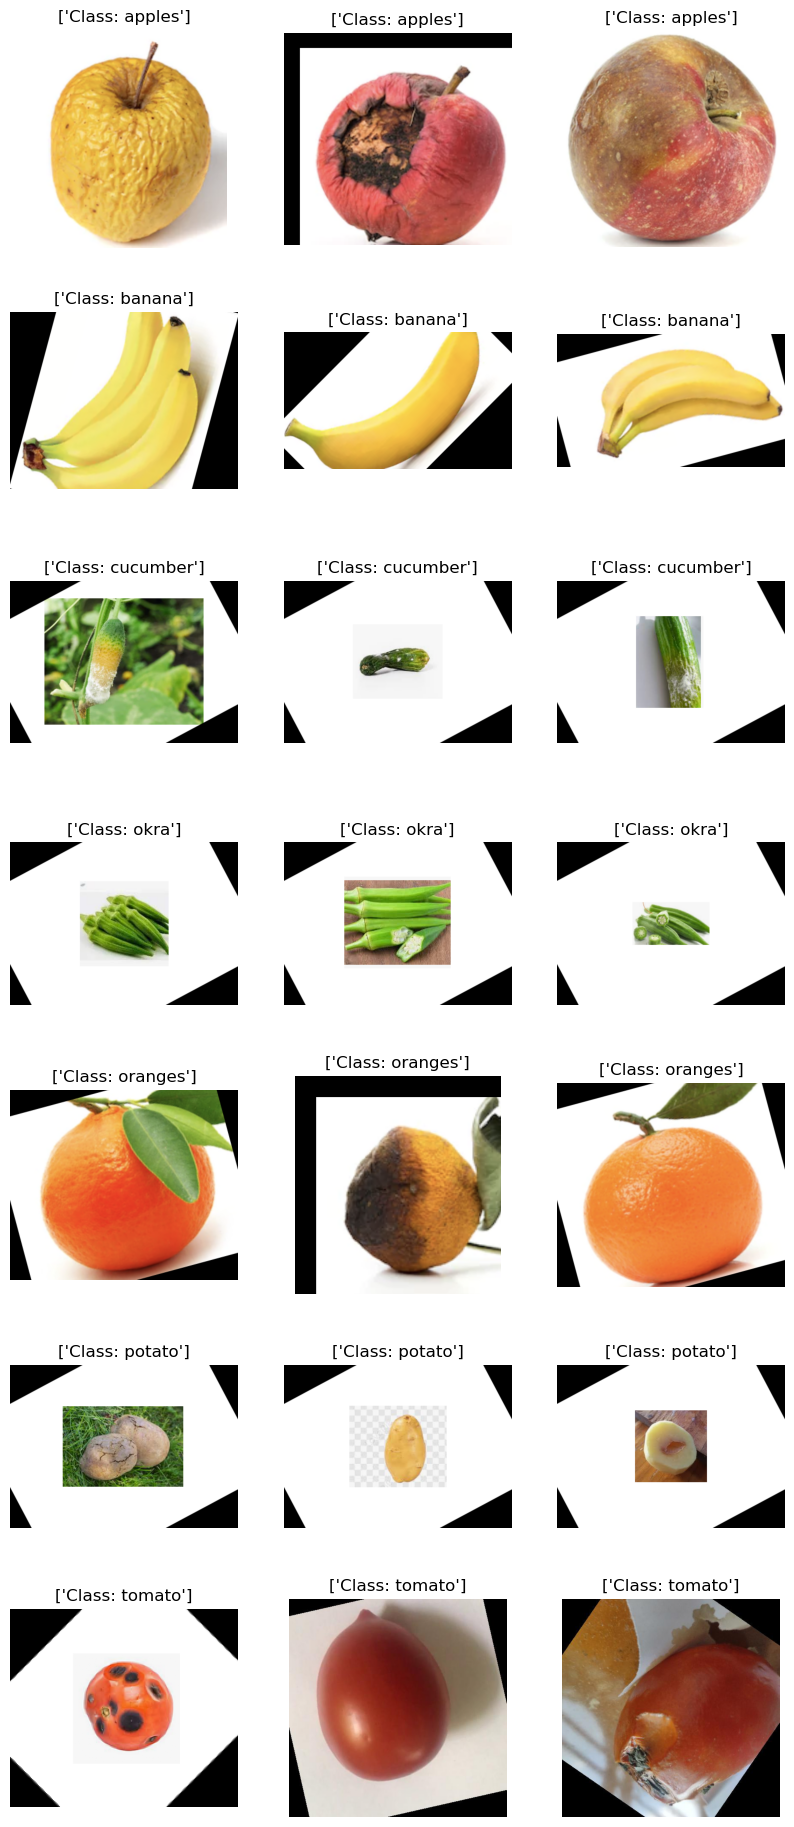

In [ ]:
def load_image(path):
    img = plt.imread(path)
    return img

counter = 0

plt.figure(figsize = (10, 30))

for i in range(7):
    for path in df_train[df_train['fruit_label'] == i].sample(n = 3)['filename']:
        plt.subplot(9, 3, counter + 1)
        img = load_image(path)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Class:' + " " + le.inverse_transform([i]))
        counter += 1

plt.show()

In [ ]:
# n1 = 500
# df_train = df_train.sample(n=n1 , random_state=42)

In [ ]:
# df_train

In [ ]:
df_train['combined'] = df_train.apply(lambda row: f"{row['fruit']}_{ 'fresh' if row['fresh'] == 1 else 'rotten'}", axis=1)

In [ ]:
df_train

,filename,fruit,fresh,fruit_label,combined
1550,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,banana,0,1,banana_rotten
13176,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,oranges,0,4,oranges_rotten
7003,/Users/abdu_salih/Desktop/py3/dataset/Train/ro...,tomato,1,6,tomato_fresh
9808,/Users/abdu_salih/Desktop/py3/dataset/Train/ro...,banana,1,1,banana_fresh
1220,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,banana,0,1,banana_rotten
...,...,...,...,...,...
5940,/Users/abdu_salih/Desktop/py3/dataset/Train/ro...,tomato,1,6,tomato_fresh
16888,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,apples,0,0,apples_rotten
11490,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,potato,0,5,potato_rotten
13179,/Users/abdu_salih/Desktop/py3/dataset/Train/fr...,oranges,0,4,oranges_rotten


In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
y_train = pd.get_dummies(df_train['combined']).values.astype(np.float32)

In [ ]:

image_size = (32, 32)
x_train = []

for filename in df_train['filename']:
    img = cv2.imread(filename)
    img = cv2.resize(img, image_size)
    img = img / 255.0
    x_train.append(img)
x_train = np.array(x_train, dtype=np.float32)

x_test = np.array(x_train, dtype=np.float32)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [ ]:

print(y_train.shape)
print(x_train.shape)

(21044, 14)
(21044, 32, 32, 3)


In [ ]:
df_test['combined'] = df_test.apply(lambda row: f"{row['fruit']}_{ 'fresh' if row['fresh'] == 1 else 'rotten'}", axis=1)

In [ ]:
df_test

,filename,fruit,fresh,combined
4296,/Users/abdu_salih/Desktop/py3/dataset/Test/fre...,apples,0,apples_rotten
218,/Users/abdu_salih/Desktop/py3/dataset/Test/fre...,banana,0,banana_rotten
1367,/Users/abdu_salih/Desktop/py3/dataset/Test/rot...,potato,1,potato_fresh
6221,/Users/abdu_salih/Desktop/py3/dataset/Test/rot...,apples,1,apples_fresh
2703,/Users/abdu_salih/Desktop/py3/dataset/Test/rot...,banana,1,banana_fresh
...,...,...,...,...
4279,/Users/abdu_salih/Desktop/py3/dataset/Test/fre...,apples,0,apples_rotten
3241,/Users/abdu_salih/Desktop/py3/dataset/Test/rot...,banana,1,banana_fresh
397,/Users/abdu_salih/Desktop/py3/dataset/Test/fre...,banana,0,banana_rotten
63,/Users/abdu_salih/Desktop/py3/dataset/Test/fre...,banana,0,banana_rotten


In [ ]:
# n1 = 500
# df_test = df_test.sample(n=n1 , random_state=42)

In [ ]:
y_test = pd.get_dummies(df_test['combined']).values.astype(np.float32)
image_size = (32, 32)
x_test = []
for filename in df_test['filename']:
    img = cv2.imread(filename)
    img = cv2.resize(img, image_size)
    img = img / 255.0
    x_test.append(img)

x_test = np.array(x_test, dtype=np.float32)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [ ]:
print(y_test.shape)
print(x_test.shape)

(6738, 14)
(6738, 32, 32, 3)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print( y_test.shape)

(21044, 32, 32, 3)
(21044, 14)
(6738, 14)


# Model

In [ ]:


from tensorflow.keras import layers, models
from tensorflow.keras import models, layers, optimizers

from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
optimizer = Adam()
import numpy as np

if y_train.ndim == 2 and y_train.shape[1] > 1:
    y_train = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)


### Model 1

In [ ]:

def create_basic_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(14, activation='softmax')
    ])
    model.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


### Model 2

In [ ]:

def create_deeper_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(14, activation='softmax')
    ])
    model.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

### Model 3

In [ ]:

def create_cnn_with_dropout():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(14, activation='softmax')  #
    ])
    model.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:

models = [create_basic_cnn(), create_deeper_cnn(), create_cnn_with_dropout()]
model_names = ["Basic CNN", "Deeper CNN", "CNN with Dropout"]


for model, name in zip(models, model_names):
    print(f"Training {name}")
    model.fit(x_train, y_train, epochs=1, validation_split=0.2)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test accuracy for {name}: {test_acc * 100:.2f}%")


Training simple model with Adam optimizer:


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8702 - loss: 0.4642 - val_accuracy: 0.9680 - val_loss: 0.1199
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9640 - loss: 0.1267 - val_accuracy: 0.9748 - val_loss: 0.0900
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9779 - loss: 0.0777 - val_accuracy: 0.9765 - val_loss: 0.0838
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9821 - loss: 0.0600 - val_accuracy: 0.9748 - val_loss: 0.0809
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9862 - loss: 0.0473 - val_accuracy: 0.9768 - val_loss: 0.0763
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.9712 - loss: 0.0975
Test accuracy for simple model with Adam: 97.67%


Training multi_layer model with SGD optimizer:
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6807 - loss: 1.1228 - val_accuracy: 0.9240 - val_loss: 0.2612
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/ste

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,542 (795.09 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,772 (397.55 KB)

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'{test_accuracy*100:.2f}%')

313/313 - 0s - 1ms/step - accuracy: 0.9680 - loss: 0.1190
96.80%


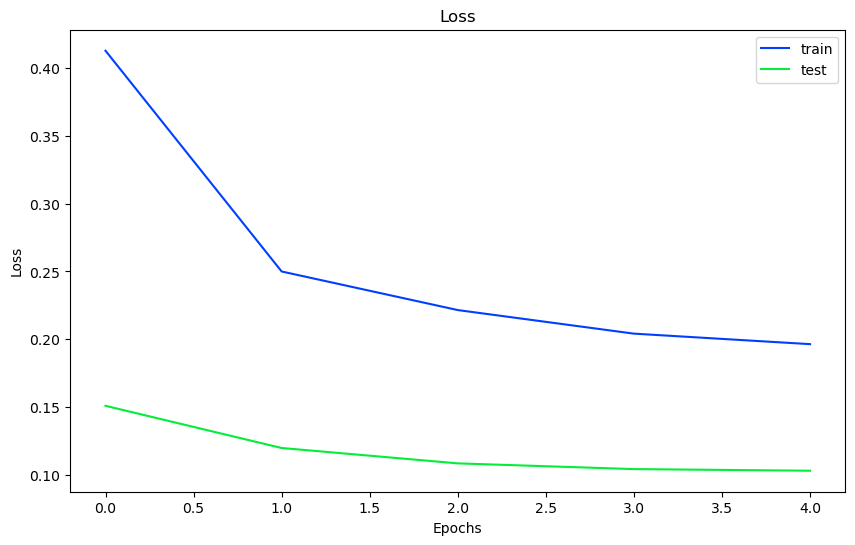

In [ ]:

plt.figure(figsize=(10, 6))
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import keras_tuner as kt

def build_model(hp):
    model = Sequential([
        Conv2D(filters=hp.Int('filters', min_value=32, max_value=256, step=32),
               kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2, 2))
    ])

    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(Conv2D(filters=hp.Int('filters_' + str(i), min_value=32, max_value=256, step=32),
                         kernel_size=(3, 3), activation='relu'))
        if hp.Choice('dropout_' + str(i), [True, False]):
            model.add(Dropout(rate=0.5))
        model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(14, activation='softmax'))

    optimizer_name = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="mt_dataset", project_name="my_rnd_search", seed=42)
random_search_tuner.search(x_train, y_train, epochs=1,
                           validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 32s]
val_accuracy: 0.9578999876976013

Best val_accuracy So Far: 0.9749000072479248
Total elapsed time: 00h 03m 52s


In [ ]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

/opt/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
/opt/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [ ]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_layers': 2,
 'units_0': 480,
 'dropout': 1,
 'optimizer': 'rmsprop',
 'learning_rate': 0.00012165541012624621,
 'units_1': 320}

In [ ]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 2 summary
Hyperparameters:
n_layers: 2
units_0: 480
dropout: 1
optimizer: rmsprop
learning_rate: 0.00012165541012624621
units_1: 320
Score: 0.9749000072479248


In [ ]:
best_model.fit(x_train, y_train, epochs=2)
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9556 - loss: 0.1543
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9586 - loss: 0.1422
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.9702 - loss: 0.0942
Test Accuracy: 97.69%
